In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing import image

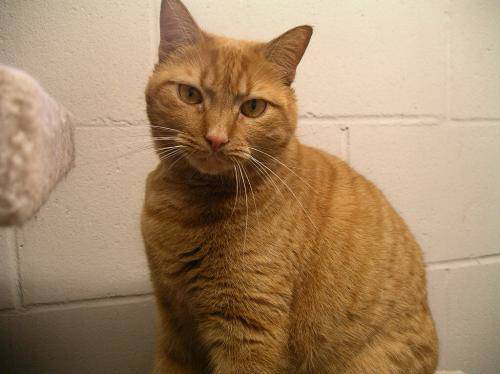

In [2]:
imgData = image.load_img( 'image/cat/cat1.jpg')
imgData

In [3]:
type( imgData )

PIL.JpegImagePlugin.JpegImageFile

In [4]:
dataGen = image.ImageDataGenerator( rescale=1./255 )

In [5]:
trainGen = dataGen.flow_from_directory( 'image', target_size=(98,98))

Found 20 images belonging to 2 classes.


In [6]:
type( trainGen )

keras.preprocessing.image.DirectoryIterator

In [7]:
x_train , y_train = trainGen.next()

In [8]:
x_train.shape

(20, 98, 98, 3)

In [9]:
y_train.shape

(20, 2)

In [10]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

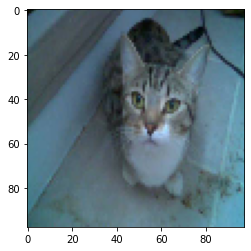

In [11]:
plt.imshow( x_train[0])
plt.show()

In [12]:
x_train[0]

array([[[0.04705883, 0.03529412, 0.00784314],
        [0.03137255, 0.0509804 , 0.03529412],
        [0.03137255, 0.08627451, 0.08627451],
        ...,
        [0.10196079, 0.15294118, 0.07450981],
        [0.10588236, 0.14117648, 0.06666667],
        [0.07058824, 0.12156864, 0.05490196]],

       [[0.03529412, 0.02745098, 0.        ],
        [0.06666667, 0.10980393, 0.08627451],
        [0.20392159, 0.3137255 , 0.31764707],
        ...,
        [0.07450981, 0.10588236, 0.04705883],
        [0.07058824, 0.09803922, 0.02745098],
        [0.03921569, 0.07058824, 0.01960784]],

       [[0.09411766, 0.12156864, 0.19607845],
        [0.2392157 , 0.30588236, 0.40784317],
        [0.25490198, 0.38431376, 0.5058824 ],
        ...,
        [0.01568628, 0.03921569, 0.03921569],
        [0.03137255, 0.07058824, 0.03529412],
        [0.04705883, 0.09411766, 0.05490196]],

       ...,

       [[0.21568629, 0.3921569 , 0.37254903],
        [0.19607845, 0.40000004, 0.3921569 ],
        [0.22352943, 0

In [13]:
y_train[0]

array([1., 0.], dtype=float32)

In [14]:
trainGen.class_indices

{'cat': 0, 'dog': 1}

In [15]:
# x_train.reshape( 20, -1)
x_train.reshape( 20, 98*98*3)

array([[0.04705883, 0.03529412, 0.00784314, ..., 0.32941177, 0.65882355,
        0.7686275 ],
       [0.5529412 , 0.5019608 , 0.43529415, ..., 0.4666667 , 0.44705886,
        0.36078432],
       [0.48235297, 0.49803925, 0.15686275, ..., 0.32156864, 0.33333334,
        0.1254902 ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.12156864, 0.09803922, 0.09803922, ..., 0.59607846, 0.6       ,
        0.5803922 ],
       [0.2509804 , 0.4156863 , 0.16862746, ..., 0.58431375, 0.75294125,
        0.34117648]], dtype=float32)

In [28]:
model = Sequential()
model.add( Flatten( input_shape=(98,98,3)))
model.add( Dense( units=64, activation='relu' ))
model.add( Dense( units=32, activation='relu' ))
model.add( Dense( units=2, activation='softmax' ))
model.compile( loss='categorical_crossentropy', optimizer='adam',
             metrics=['acc'] )
h = model.fit( x_train, y_train, epochs= 50)

Epoch 1/50
1/1 [==============================] - 0s 206ms/step - loss: 0.6968 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 4.8246 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 5.9008 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6029 - acc: 0.6000
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 3.5911 - acc: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 2.6781 - acc: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3735 - acc: 0.8500
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 2.0917 - acc: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 1.3359 - acc: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 0.3466 - acc: 0.8500
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 1.1524 -

In [23]:
model.save('catdog.h5')

In [36]:
h.history

{'loss': [0.696823000907898,
  4.824589729309082,
  5.900790214538574,
  0.6029187440872192,
  3.5911083221435547,
  2.6781351566314697,
  0.37350884079933167,
  2.0917491912841797,
  1.335868000984192,
  0.34657377004623413,
  1.1524020433425903,
  0.8450496792793274,
  0.20665815472602844,
  0.7076443433761597,
  0.7655048370361328,
  0.24114203453063965,
  0.31771573424339294,
  0.5722719430923462,
  0.4382185935974121,
  0.15458154678344727,
  0.24867908656597137,
  0.3915296196937561,
  0.19906233251094818,
  0.10658274590969086,
  0.21749743819236755,
  0.24785205721855164,
  0.14345328509807587,
  0.0664302408695221,
  0.10901959240436554,
  0.16109809279441833,
  0.10120437294244766,
  0.04750440642237663,
  0.05922341346740723,
  0.09089326113462448,
  0.08866062760353088,
  0.05378974601626396,
  0.031111055985093117,
  0.03337749093770981,
  0.048991523683071136,
  0.052696436643600464,
  0.03722742944955826,
  0.02372172102332115,
  0.020469484850764275,
  0.024561580270528

In [30]:
import pickle

In [33]:
my=[10,20,30]

In [35]:
fp = open( 'catdog.history','wb')
pickle.dump( h.history, fp)
fp.close()

In [37]:
import shelve

In [38]:
sh = shelve.open('myhist')
sh['myh'] = h.history
sh.close()

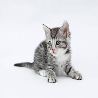

In [17]:
testImg = image.load_img( 'image/test.jpg', target_size=(98,98))
testImg

In [18]:
imgArr = image.img_to_array( testImg )/255
imgArr

array([[[0.92941177, 0.93333334, 0.9529412 ],
        [0.92941177, 0.93333334, 0.9529412 ],
        [0.92941177, 0.93333334, 0.9529412 ],
        ...,
        [0.9098039 , 0.9137255 , 0.93333334],
        [0.9098039 , 0.9137255 , 0.93333334],
        [0.9098039 , 0.9137255 , 0.93333334]],

       [[0.92941177, 0.93333334, 0.9529412 ],
        [0.92941177, 0.93333334, 0.9529412 ],
        [0.92941177, 0.93333334, 0.9529412 ],
        ...,
        [0.9098039 , 0.9137255 , 0.93333334],
        [0.9098039 , 0.9137255 , 0.93333334],
        [0.9098039 , 0.9137255 , 0.93333334]],

       [[0.92941177, 0.93333334, 0.9529412 ],
        [0.92941177, 0.93333334, 0.9529412 ],
        [0.92941177, 0.93333334, 0.9529412 ],
        ...,
        [0.9098039 , 0.9137255 , 0.93333334],
        [0.9098039 , 0.9137255 , 0.93333334],
        [0.9098039 , 0.9137255 , 0.93333334]],

       ...,

       [[0.9529412 , 0.95686275, 0.9764706 ],
        [0.9529412 , 0.95686275, 0.9764706 ],
        [0.9529412 , 0

In [19]:
imgArr.shape

(98, 98, 3)

In [20]:
model.predict( imgArr.reshape(1,98,98,3) )

array([[0.9105883 , 0.08941174]], dtype=float32)

In [21]:
model.predict( imgArr.reshape(1,98,98,3) ).argmax(axis=1)

array([0], dtype=int64)

1x28812 28812x64   1x64 64x32 1x32 32x2 1x2

In [ ]:
98*98*3